# WGAN-GP Training

## imports

In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_celeb

import pickle


In [55]:
# run params
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'png'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

## data

In [56]:
BATCH_SIZE = 128
IMAGE_SIZE = 128

In [57]:
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)

Found 20000 images belonging to 250 classes.


In [58]:
x_train[0][0][0]

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

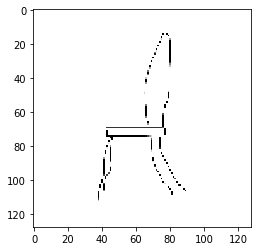

In [59]:
plt.imshow((x_train[0][0][0]+1)/2)

## architecture

In [61]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [128,256,512,1024]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (8, 8, 1024)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [512,256,128,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))


In [62]:
gan.critic.summary()

Model: "model_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 128, 128, 3)]     0         
_________________________________________________________________
critic_conv_0 (Conv2D)       multiple                  9728      
_________________________________________________________________
leaky_re_lu_128 (LeakyReLU)  multiple                  0         
_________________________________________________________________
critic_conv_1 (Conv2D)       multiple                  819456    
_________________________________________________________________
leaky_re_lu_129 (LeakyReLU)  multiple                  0         
_________________________________________________________________
critic_conv_2 (Conv2D)       multiple                  3277312   
_________________________________________________________________
leaky_re_lu_130 (LeakyReLU)  multiple                  0  

In [63]:
gan.generator.summary()

Model: "model_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_33 (Dense)             (None, 65536)             6619136   
_________________________________________________________________
batch_normalization_64 (Batc (None, 65536)             262144    
_________________________________________________________________
leaky_re_lu_132 (LeakyReLU)  (None, 65536)             0         
_________________________________________________________________
reshape_16 (Reshape)         (None, 8, 8, 1024)        0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 16, 16, 512)       13107712  
_________________________________________________________________
batch_normalization_65 (Batc (None, 16, 16, 512)       204

## training

In [66]:
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 100
N_CRITIC = 5
BATCH_SIZE = 128

In [67]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)

ResourceExhaustedError: 2 root error(s) found.
  (0) Resource exhausted: OOM when allocating a buffer of 41943296 bytes
	 [[{{node training_10/Adam/gradients/gradients/model_46/leaky_re_lu_131/LeakyRelu_grad/LeakyReluGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[loss_14/add_1/_2143]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

  (1) Resource exhausted: OOM when allocating a buffer of 41943296 bytes
	 [[{{node training_10/Adam/gradients/gradients/model_46/leaky_re_lu_131/LeakyRelu_grad/LeakyReluGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

0 successful operations.
0 derived errors ignored.

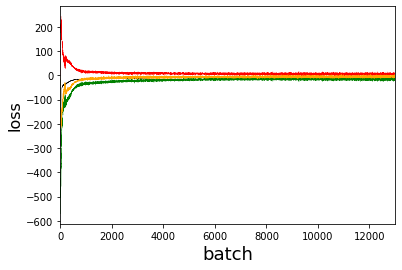

In [86]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 13000)
# plt.ylim(0, 2)

plt.show()
